IMPORTING THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn .model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
fd=pd.read_csv('/content/flightdata.csv')

In [4]:
#Analyze The Data
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [5]:
fd.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [7]:
fd.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [9]:
fd=fd.fillna({'ARR_DEL15':1})
fd=fd.fillna({'DEP_DEL15':0})
fd.iloc[177:185]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
177,2016,1,1,9,6,DL,N3743H,2834,13487,MSP,...,852,1151.0,NaN,1.0,0.0,1.0,231.0,NaN,1399.0,NaN
178,2016,1,1,9,6,DL,N975AT,2839,11433,DTW,...,1724,1709.0,-15.0,0.0,0.0,0.0,117.0,106.0,509.0,NaN
179,2016,1,1,10,7,DL,N924DN,86,13487,MSP,...,1632,NaN,NaN,1.0,1.0,0.0,104.0,NaN,528.0,NaN
180,2016,1,1,10,7,DL,N671DN,87,11433,DTW,...,1649,1703.0,14.0,0.0,0.0,0.0,129.0,119.0,528.0,NaN
181,2016,1,1,10,7,DL,N319NB,423,12478,JFK,...,1600,1607.0,7.0,0.0,0.0,0.0,155.0,151.0,760.0,NaN
182,2016,1,1,10,7,DL,N587NW,440,12478,JFK,...,849,835.0,-14.0,0.0,0.0,0.0,159.0,146.0,760.0,NaN
183,2016,1,1,10,7,DL,N813DN,485,12478,JFK,...,1945,1955.0,10.0,0.0,0.0,0.0,390.0,335.0,2422.0,NaN
184,2016,1,1,10,7,DL,N922DX,557,13487,MSP,...,912,1500.0,NaN,1.0,0.0,1.0,107.0,NaN,528.0,NaN


In [8]:
fd['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

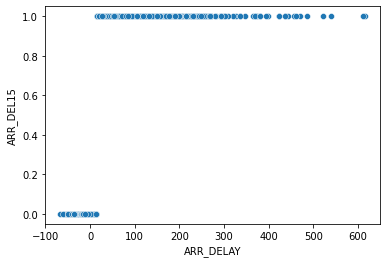

In [ ]:
sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15',data=fd)

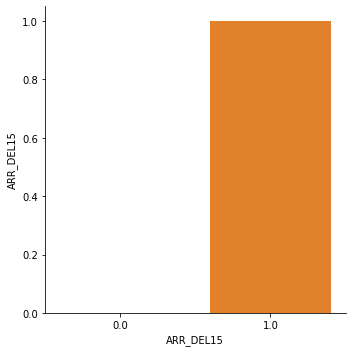

In [ ]:
sns.catplot(x='ARR_DEL15',y='ARR_DEL15',kind='bar',data=fd)

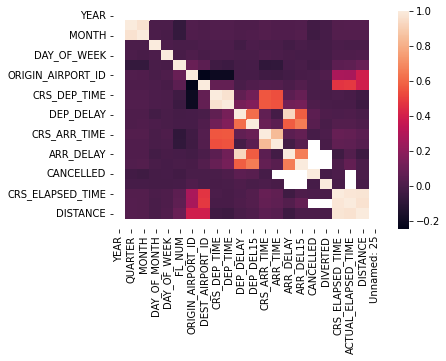

In [ ]:
sns.heatmap(fd.corr())

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fd['DEAT']=le.fit_transform(fd['DEST'])
fd['ORIGIN']=le.fit_transform(fd['ORIGIN'])
fd.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25,DEAT
0,2016,1,1,1,5,DL,N836DN,1399,10397,0,...,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN,4
1,2016,1,1,1,5,DL,N964DN,1476,11433,1,...,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN,3
2,2016,1,1,1,5,DL,N813DN,1597,10397,0,...,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN,4
3,2016,1,1,1,5,DL,N587NW,1768,14747,4,...,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN,3
4,2016,1,1,1,5,DL,N836DN,1823,14747,4,...,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN,1


In [22]:
fd["DELAY_15"]=fd["ARR_DEL15"]+fd["DEP_DEL15"]
fd.DELAY_15.unique()

array([0., 1., 2.])

In [23]:
fd["DELAY_15"].fillna(0,inplace=True)
fd.DELAY_15.unique()

array([0., 1., 2.])

In [25]:
fd["NDELAY"]=fd["DELAY_15"]+fd["CANCELLED"]+fd["DIVERTED"]
len(fd["TAIL_NUM"].value_counts()),len(fd["FL_NUM"].value_counts())

(789, 690)

In [28]:
clm=["UNIQUE_CARRIER","DEP_TIME","DEP_DELAY","DEP_DEL15","ARR_TIME","ARR_DELAY","ARR_DEL15","CANCELLED","DIVERTED",
"DELAY_15"]
fd2=fd.drop(columns=clm)
fd2.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25,DEAT,NDELAY
0,2016,1,1,1,5,N836DN,1399,10397,0,14747,SEA,1905,2143,338.0,295.0,2182.0,NaN,4,0.0
1,2016,1,1,1,5,N964DN,1476,11433,1,13487,MSP,1345,1435,110.0,115.0,528.0,NaN,3,0.0
2,2016,1,1,1,5,N813DN,1597,10397,0,14747,SEA,940,1215,335.0,300.0,2182.0,NaN,4,0.0
3,2016,1,1,1,5,N587NW,1768,14747,4,13487,MSP,819,1335,196.0,205.0,1399.0,NaN,3,0.0
4,2016,1,1,1,5,N836DN,1823,14747,4,11433,DTW,2300,607,247.0,259.0,1927.0,NaN,1,0.0


In [29]:
fd3=fd2.drop(columns=["TAIL_NUM","FL_NUM"])

In [30]:
x=fd2.drop(columns=["NDELAY","TAIL_NUM"])
y=fd2.NDELAY

In [32]:
x["ORIGIN"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)
x["DEST"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)

In [37]:
from sklearn.utils import shuffle
X,Y=shuffle(x,y,random_state=72)
X.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,CRS_ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25,DEAT
5546,2016,3,7,7,4,2802,10397,0,11433,2,2114,2316,122.0,109.0,594.0,NaN,1
4454,2016,2,6,2,4,1107,10397,0,14747,5,1935,2159,324.0,322.0,2182.0,NaN,4
10860,2016,4,12,20,2,1057,10397,0,14747,5,1110,1346,336.0,348.0,2182.0,NaN,4
2939,2016,2,4,18,1,16,14747,4,10397,1,1043,1832,289.0,284.0,2182.0,NaN,0
5412,2016,3,7,4,1,748,10397,0,11433,2,1055,1257,122.0,110.0,594.0,NaN,1


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((8984, 17), (2247, 17))